In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",delimiter=',', encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.isnull().count()

v1            5572
v2            5572
Unnamed: 2    5572
Unnamed: 3    5572
Unnamed: 4    5572
dtype: int64

In [4]:
df.shape 

(5572, 5)

In [5]:
df.shape 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# DATA CLEANING

In [12]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicate values
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EDA

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

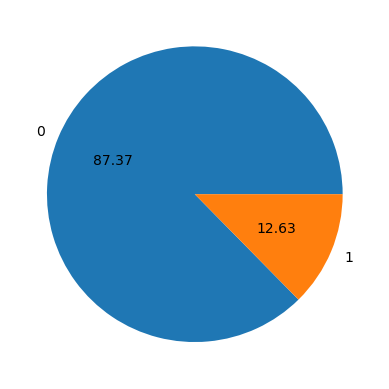

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['0','1'],autopct="%0.2f")
plt.show()

In [19]:
#imbalanced data

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['chars']=df['text'].apply(len)

In [23]:
df.head()

,target,text,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['chars','num_words','num_sent']].describe()

,chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
#ham
df[df['target']==0][['chars','num_words','num_sent']].describe()

,chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
#spam
df[df['target']==1][['chars','num_words','num_sent']].describe()

,chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='chars', ylabel='Count'>

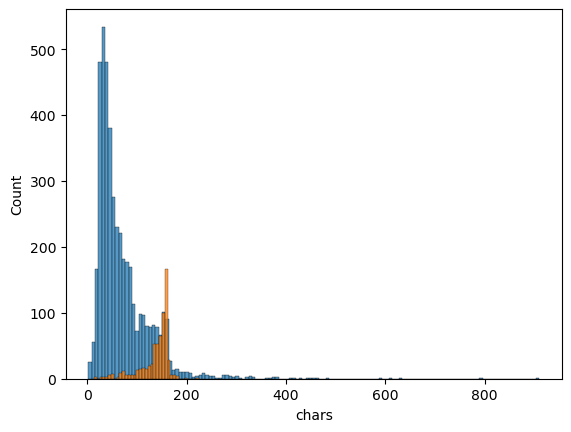

In [31]:
sns.histplot(df[df['target']==0]['chars'])
sns.histplot(df[df['target']==1]['chars'])

<Axes: xlabel='num_words', ylabel='Count'>

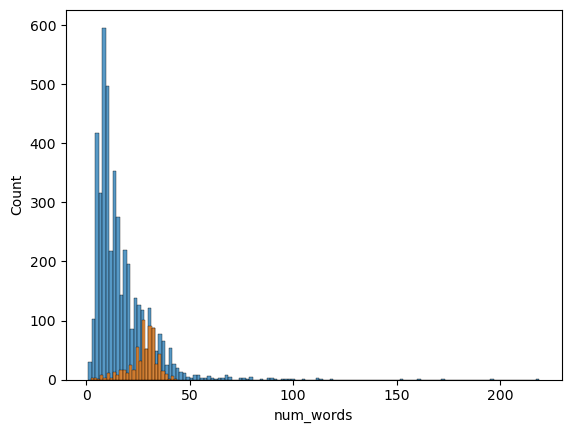

In [32]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

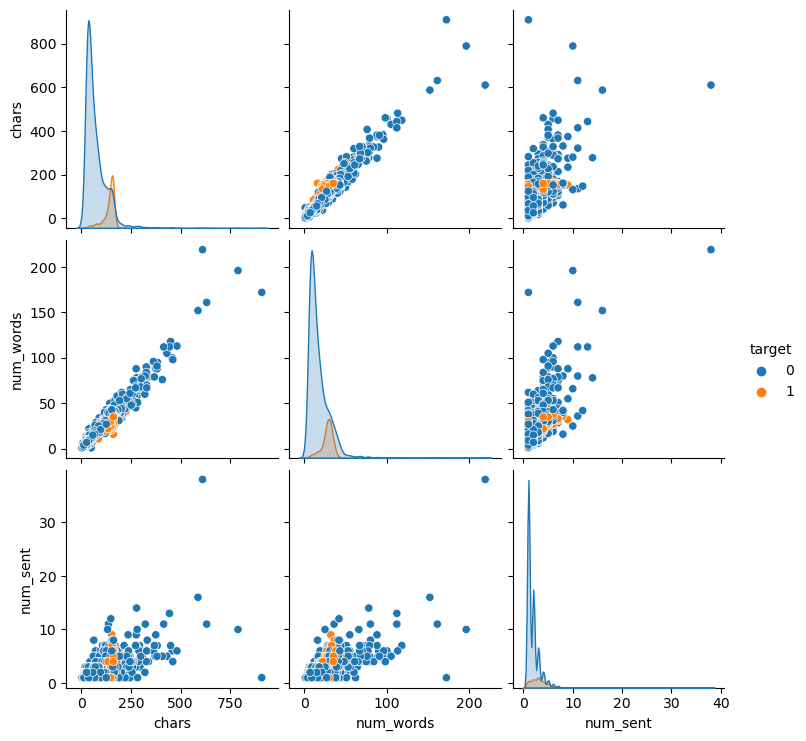

In [33]:
sns.pairplot(df,hue='target')

/tmp/ipykernel_20/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

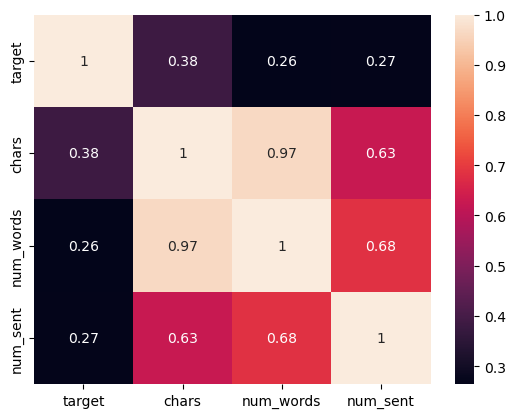

In [34]:
sns.heatmap(df.corr(),annot=True)

# DATA PREPROCESSING
* lower case
* tokenization
* removing special cases
* removing stop words and punctuation
* stemming

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x=[]
    for i in text:
        if i.isalnum():
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
    return " ".join(x)

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [39]:
df['transform_text']=df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,chars,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

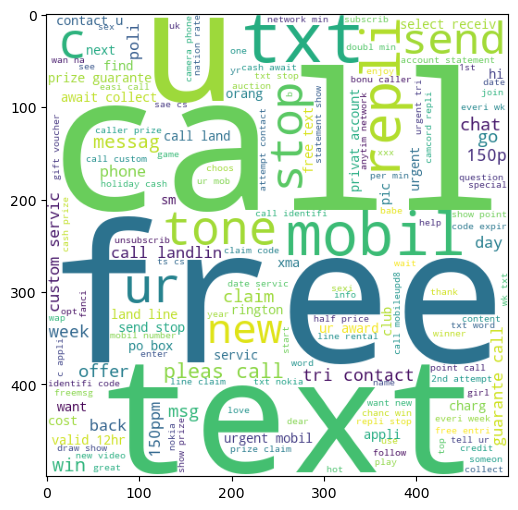

In [43]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

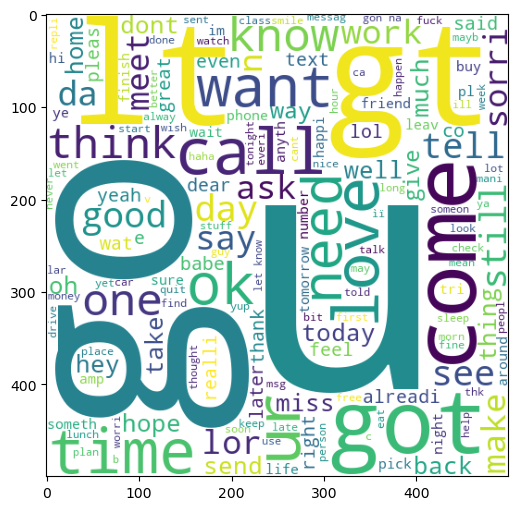

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

# MODEL BUILDING

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [48]:
y = df['target'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
#gnb.fit(x_train,y_train)
#y_pred1=gnb.predict(x_test)
#print(accuracy_score(y_test,y_pred1))
#print(confusion_matrix(y_test,y_pred1))
#print(precision_score(y_test,y_pred1))

In [54]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0
